In [1]:
import numpy as np
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
#from tensorflow.keras import layers
#need tensorflow gpu 

2024-12-06 20:36:45.201963: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-06 20:36:45.351372: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733513805.436145    5674 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733513805.460829    5674 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-06 20:36:45.602512: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)



Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPUs


I0000 00:00:1733513808.596353    5674 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2613 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5


In [3]:
from Exctract_features import *
pwd = "./513_distribute" 
label = {'H': 0, 'E': 1, 'C': 2}

df1 = create_dataset(pwd, 'ohe', True) 
print("Done")# Depuis le script Exctract_features
display(df1)

Precessing files ...


Processing files: 100%|██████████████████████| 513/513 [00:00<00:00, 534.58it/s]


Encoding ...
OneHot Encoding ...


Processing files: 100%|████████████████| 77963/77963 [00:01<00:00, 55654.56it/s]


Precessing files ...


Processing files: 100%|██████████████████████| 513/513 [00:00<00:00, 672.04it/s]


Encoding ...
OneHot Encoding ...


Processing files: 100%|████████████████| 77963/77963 [00:01<00:00, 56074.17it/s]


Resampling ...
Processing... Please wait.
Resampling complete!
Done


/home/ygouzy/Documents/GitHub/MLP_avec_Taveau/Exctract_features.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  resampled_df['DSSP'] = y_resampled


,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,DSSP
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
111434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
111435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
111436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
x = df1.drop('DSSP', axis=1)
y = df1['DSSP']
display(x)
display(y)

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,259
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0         2
1         2
2         2
3         2
4         2
         ..
111433    1
111434    1
111435    1
111436    1
111437    1
Name: DSSP, Length: 111438, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)
display(y_train_one_hot)

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [6]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='min')

In [7]:
model = keras.Sequential([
    keras.layers.Dense(500, activation='relu'),  
    keras.layers.Dense(256, activation='relu'), 
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(3, activation='softmax')                   
])

opt = keras.optimizers.Adam(learning_rate=0.008)
#3 sortit couche softmax pour avoir les proba de chaque class 
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
history = model.fit(X_train, y_train_one_hot, epochs=3, batch_size=32, validation_data=(X_test, y_test_one_hot),callbacks=early_stopping)

Epoch 1/3


I0000 00:00:1733513883.893056    6118 service.cc:148] XLA service 0x7ff114016dc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733513883.893102    6118 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 with Max-Q Design, Compute Capability 7.5
2024-12-06 20:38:03.922876: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733513884.014244    6118 cuda_dnn.cc:529] Loaded cuDNN version 90300


 121/2786 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4773 - loss: 1.0308

I0000 00:00:1733513884.958522    6118 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2786/2786 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6018 - loss: 0.8540 - val_accuracy: 0.6493 - val_loss: 0.7662
Epoch 2/3
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6728 - loss: 0.7336 - val_accuracy: 0.6578 - val_loss: 0.7500
Epoch 3/3
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7150 - loss: 0.6560 - val_accuracy: 0.6566 - val_loss: 0.7567


In [9]:
# Function to plot training and validation loss
def plot_loss(history, title="Loss Curve"):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

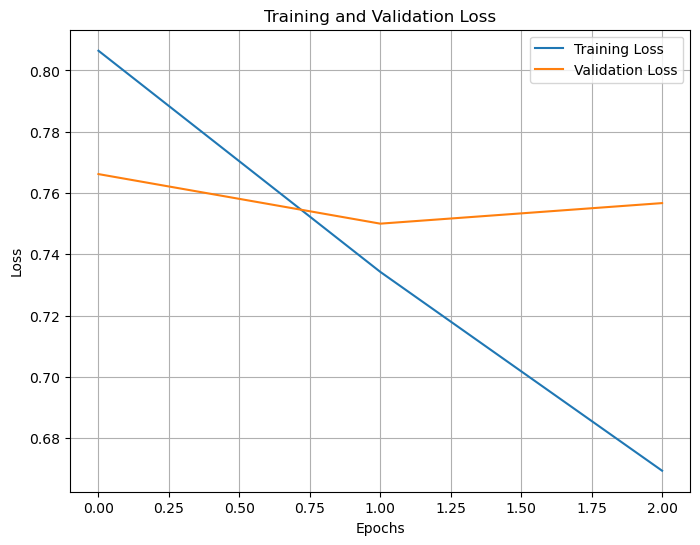

In [10]:
# Call the plot_loss function with the captured history
plot_loss(history, title="Training and Validation Loss")

In [11]:
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy*100:.4f}')

697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 994us/step - accuracy: 0.6568 - loss: 0.7515
Loss: 0.7567, Accuracy: 65.6631


697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 720us/step


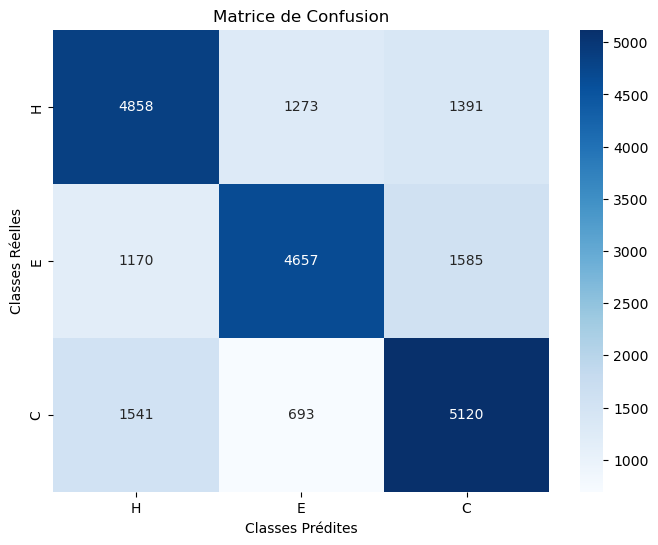

In [12]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Classes prédite avec la plus haute probabilité

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred_classes)

# Visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['H', 'E', 'C'], yticklabels=['H', 'E', 'C'])
plt.title('Matrice de Confusion')
plt.xlabel('Classes Prédites')
plt.ylabel('Classes Réelles')
plt.show()

In [13]:
from Exctract_features import *
pwd = "./513_distribute" 
label = {'H': 0, 'E': 1, 'C': 2}

df2 = create_dataset(pwd, 'freq',True) # Depuis le script Exctract_features
display(df2)

Precessing files ...


Processing files: 100%|██████████████████████| 513/513 [00:00<00:00, 671.85it/s]


Encoding ...
Frequences calculation ...


Processing files: 100%|███████████████| 77963/77963 [00:00<00:00, 304257.86it/s]


Resampling ...
Processing... Please wait.
Resampling complete!


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,DSSP
0,0.000000,0.153846,0.153846,0.153846,0.076923,0.000000,0.000000,0.076923,0.000000,0.076923,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.0,0.076923,0.076923,2
1,0.000000,0.076923,0.153846,0.153846,0.076923,0.000000,0.000000,0.076923,0.000000,0.076923,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.230769,0.0,0.076923,0.076923,2
2,0.000000,0.076923,0.153846,0.153846,0.076923,0.000000,0.000000,0.153846,0.000000,0.076923,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.0,0.076923,0.076923,2
3,0.076923,0.076923,0.153846,0.076923,0.076923,0.000000,0.000000,0.153846,0.000000,0.076923,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.0,0.076923,0.076923,2
4,0.076923,0.076923,0.153846,0.076923,0.000000,0.000000,0.000000,0.153846,0.000000,0.076923,...,0.000000,0.000000,0.000000,0.000000,0.076923,0.153846,0.0,0.076923,0.076923,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111433,0.109593,0.076923,0.153846,0.076923,0.044253,0.000000,0.000000,0.000000,0.076923,0.000000,...,0.109593,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.121176,0.076923,1
111434,0.076923,0.025690,0.076923,0.076923,0.051233,0.128156,0.025690,0.128156,0.076923,0.025690,...,0.000000,0.000000,0.076923,0.000000,0.076923,0.153846,0.0,0.000000,0.000000,1
111435,0.076923,0.133752,0.000000,0.097017,0.000000,0.000000,0.076923,0.076923,0.000000,0.020094,...,0.000000,0.000000,0.076923,0.210675,0.076923,0.000000,0.0,0.000000,0.076923,1
111436,0.000000,0.076923,0.076923,0.153846,0.000000,0.000000,0.076733,0.000000,0.000000,0.000000,...,0.077113,0.076923,0.000000,0.000000,0.076923,0.000000,0.0,0.000190,0.153656,1


In [14]:
x = df2.drop('DSSP', axis=1)
y = df2['DSSP']
display(x)
display(y)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.153846,0.153846,0.153846,0.076923,0.000000,0.000000,0.076923,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.0,0.076923,0.076923
1,0.000000,0.076923,0.153846,0.153846,0.076923,0.000000,0.000000,0.076923,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230769,0.0,0.076923,0.076923
2,0.000000,0.076923,0.153846,0.153846,0.076923,0.000000,0.000000,0.153846,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.0,0.076923,0.076923
3,0.076923,0.076923,0.153846,0.076923,0.076923,0.000000,0.000000,0.153846,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.0,0.076923,0.076923
4,0.076923,0.076923,0.153846,0.076923,0.000000,0.000000,0.000000,0.153846,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.153846,0.0,0.076923,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111433,0.109593,0.076923,0.153846,0.076923,0.044253,0.000000,0.000000,0.000000,0.076923,0.000000,0.153846,0.109593,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.121176,0.076923
111434,0.076923,0.025690,0.076923,0.076923,0.051233,0.128156,0.025690,0.128156,0.076923,0.025690,0.000000,0.000000,0.000000,0.076923,0.000000,0.076923,0.153846,0.0,0.000000,0.000000
111435,0.076923,0.133752,0.000000,0.097017,0.000000,0.000000,0.076923,0.076923,0.000000,0.020094,0.076923,0.000000,0.000000,0.076923,0.210675,0.076923,0.000000,0.0,0.000000,0.076923
111436,0.000000,0.076923,0.076923,0.153846,0.000000,0.000000,0.076733,0.000000,0.000000,0.000000,0.230769,0.077113,0.076923,0.000000,0.000000,0.076923,0.000000,0.0,0.000190,0.153656


0         2
1         2
2         2
3         2
4         2
         ..
111433    1
111434    1
111435    1
111436    1
111437    1
Name: DSSP, Length: 111438, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)
display(y_train_one_hot)

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [16]:
model2 = keras.Sequential([
    keras.layers.Dense(1000, activation='relu'), 
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(500, activation='relu'), 
    keras.layers.Dense(256, activation='relu'), 
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(3, activation='softmax')                   
])

#3 sortit couche softmax pour avoir les proba de chaque class 
opt = keras.optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [17]:
history2 = model2.fit(X_train, y_train_one_hot, 
                    epochs=40, 
                    batch_size=32, 
                    validation_data=(X_test, y_test_one_hot), 
                    callbacks=early_stopping)


Epoch 1/40
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.4537 - loss: 1.0284 - val_accuracy: 0.4738 - val_loss: 1.0091
Epoch 2/40
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4954 - loss: 0.9969 - val_accuracy: 0.4957 - val_loss: 0.9901
Epoch 3/40
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5079 - loss: 0.9763 - val_accuracy: 0.5128 - val_loss: 0.9672
Epoch 4/40
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5319 - loss: 0.9396 - val_accuracy: 0.5347 - val_loss: 0.9365
Epoch 5/40
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5756 - loss: 0.8786 - val_accuracy: 0.5665 - val_loss: 0.8898
Epoch 6/40
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6261 - loss: 0.8010 - val_accuracy: 0.6174 - val_loss: 0.8228
Epoch 7/40
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6760 - loss: 0.7165 - val_accuracy: 0.6492 - val_loss: 0.7735
Epoch 8/40
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7218 - loss: 0.6377 - 

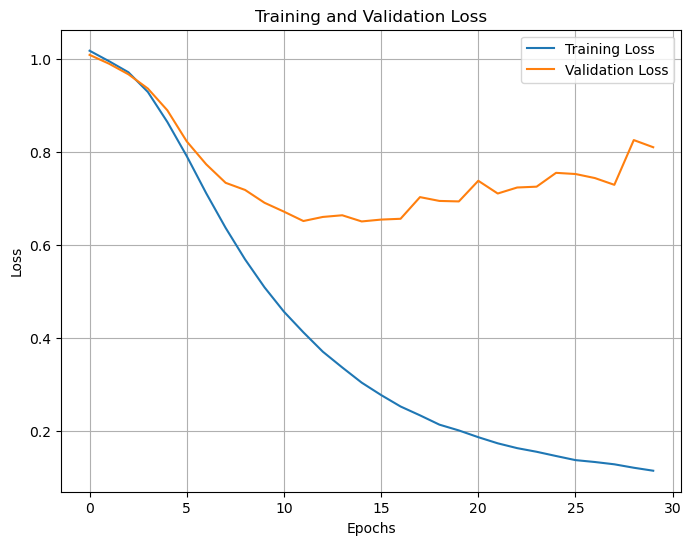

In [18]:
# Call the plot_loss function with the captured history
plot_loss(history2, title="Training and Validation Loss")

In [19]:
loss, accuracy = model2.evaluate(X_test, y_test_one_hot)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy*100:.4f}')

697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - accuracy: 0.8031 - loss: 0.8062
Loss: 0.8103, Accuracy: 80.2046


697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 837us/step


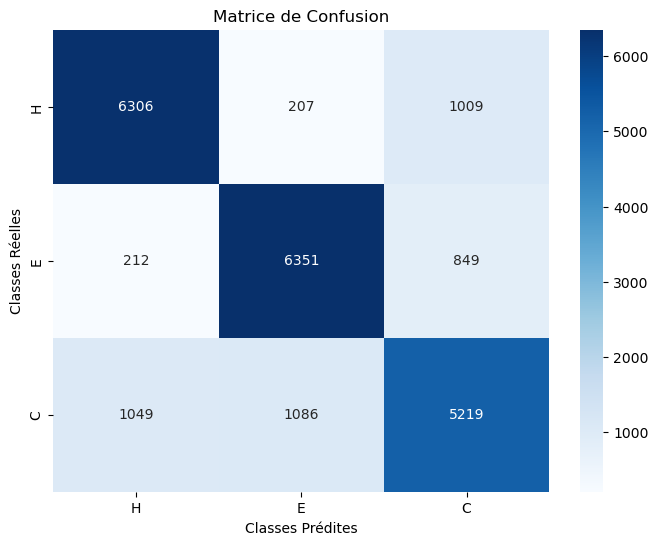

In [20]:
y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Classes prédite avec la plus haute probabilité

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred_classes)

# Visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['H', 'E', 'C'], yticklabels=['H', 'E', 'C'])
plt.title('Matrice de Confusion')
plt.xlabel('Classes Prédites')
plt.ylabel('Classes Réelles')
plt.show()

In [21]:
combine_df = pd.concat([df1, df2], axis = 1)

In [22]:
x = df2.drop('DSSP', axis=1)
y = df2['DSSP']
display(x)
display(y)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.153846,0.153846,0.153846,0.076923,0.000000,0.000000,0.076923,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.0,0.076923,0.076923
1,0.000000,0.076923,0.153846,0.153846,0.076923,0.000000,0.000000,0.076923,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230769,0.0,0.076923,0.076923
2,0.000000,0.076923,0.153846,0.153846,0.076923,0.000000,0.000000,0.153846,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.0,0.076923,0.076923
3,0.076923,0.076923,0.153846,0.076923,0.076923,0.000000,0.000000,0.153846,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.0,0.076923,0.076923
4,0.076923,0.076923,0.153846,0.076923,0.000000,0.000000,0.000000,0.153846,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.153846,0.0,0.076923,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111433,0.109593,0.076923,0.153846,0.076923,0.044253,0.000000,0.000000,0.000000,0.076923,0.000000,0.153846,0.109593,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.121176,0.076923
111434,0.076923,0.025690,0.076923,0.076923,0.051233,0.128156,0.025690,0.128156,0.076923,0.025690,0.000000,0.000000,0.000000,0.076923,0.000000,0.076923,0.153846,0.0,0.000000,0.000000
111435,0.076923,0.133752,0.000000,0.097017,0.000000,0.000000,0.076923,0.076923,0.000000,0.020094,0.076923,0.000000,0.000000,0.076923,0.210675,0.076923,0.000000,0.0,0.000000,0.076923
111436,0.000000,0.076923,0.076923,0.153846,0.000000,0.000000,0.076733,0.000000,0.000000,0.000000,0.230769,0.077113,0.076923,0.000000,0.000000,0.076923,0.000000,0.0,0.000190,0.153656


0         2
1         2
2         2
3         2
4         2
         ..
111433    1
111434    1
111435    1
111436    1
111437    1
Name: DSSP, Length: 111438, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train_comb = to_categorical(y_train, num_classes=3)
y_test_comb = to_categorical(y_test, num_classes=3)
display(y_train_comb)

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [26]:
model3 = keras.Sequential([
    keras.layers.Dense(1000, activation='relu'), 
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(500, activation='relu'), 
    keras.layers.Dense(256, activation='relu'), 
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(3, activation='softmax')                   
])

#3 sortit couche softmax pour avoir les proba de chaque class 
opt = keras.optimizers.Adam(learning_rate=0.001)
model3.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
history3 = model3.fit(X_train, y_train_comb, 
                    epochs=40, 
                    batch_size=32, 
                    validation_data=(X_test, y_test_comb), 
                    callbacks=early_stopping)


Epoch 1/40
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9629 - loss: 0.1014 - val_accuracy: 0.8001 - val_loss: 0.7573
Epoch 2/40
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9647 - loss: 0.1014 - val_accuracy: 0.8073 - val_loss: 0.7879
Epoch 3/40
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9666 - loss: 0.0919 - val_accuracy: 0.8040 - val_loss: 0.8329
Epoch 4/40
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9656 - loss: 0.0949 - val_accuracy: 0.8061 - val_loss: 0.7857
Epoch 5/40
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9677 - loss: 0.0898 - val_accuracy: 0.8064 - val_loss: 0.8423
Epoch 6/40
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9679 - loss: 0.0900 - val_accuracy: 0.8029 - val_loss: 0.8228
Epoch 7/40
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9700 - loss: 0.0826 - val_accuracy: 0.8068 - val_loss: 0.8620
Epoch 8/40
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9701 - loss: 0.0823 - 

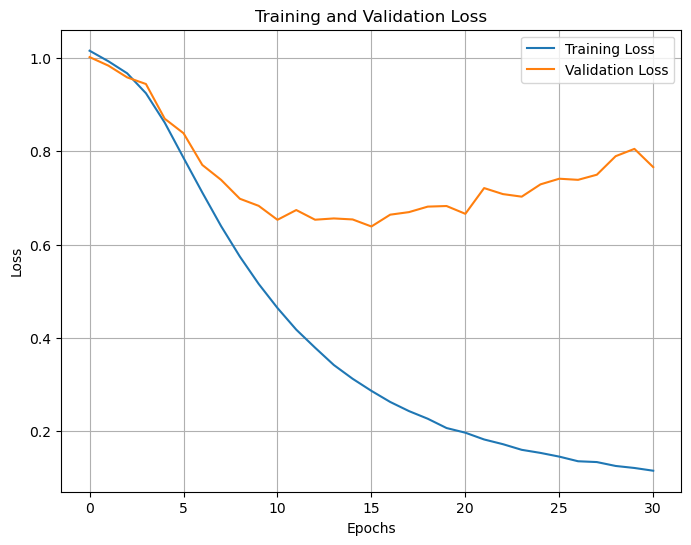

In [28]:
# Call the plot_loss function with the captured history
plot_loss(history3, title="Training and Validation Loss")

697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step


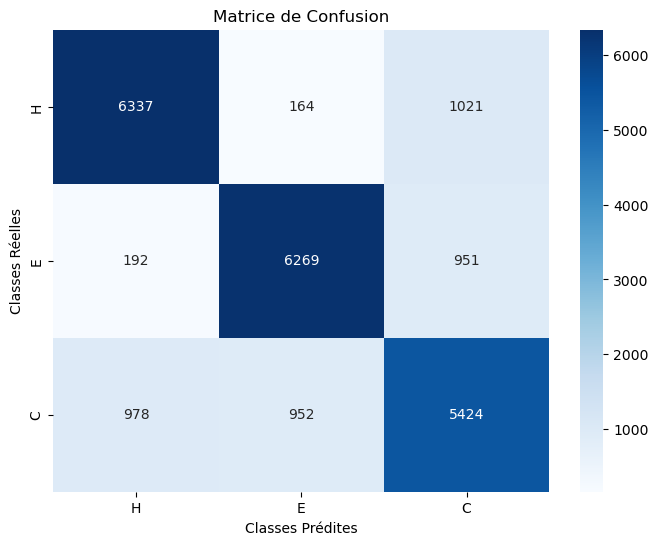

In [29]:
y_pred = model3.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Classes prédite avec la plus haute probabilité

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred_classes)

# Visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['H', 'E', 'C'], yticklabels=['H', 'E', 'C'])
plt.title('Matrice de Confusion')
plt.xlabel('Classes Prédites')
plt.ylabel('Classes Réelles')
plt.show()